In [1]:
import pandas as pd
import seaborn as sns

In [2]:
base_file_path = '../../data/'

df = pd.read_csv(base_file_path+"polished2.csv")

In [3]:
medal_rate = df.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values()
medal_rate

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20588\4180724327.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medal_rate = df.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values()


Sport
Golf                     0.037037
Triathlon                0.057034
Gymnastics               0.063543
Shooting                 0.074656
Tennis                   0.086155
Table Tennis             0.091112
Cycling                  0.108682
Archery                  0.109400
Athletics                0.112683
Badminton                0.113069
Modern Pentathlon        0.121525
Beach Volleyball         0.126394
Swimming                 0.132403
Sailing                  0.139214
Equestrianism            0.145618
Judo                     0.156269
Diving                   0.158130
Boxing                   0.162274
Fencing                  0.169650
Weightlifting            0.178884
Wrestling                0.186464
Canoeing                 0.187568
Trampolining             0.194631
Rhythmic Gymnastics      0.201626
Taekwondo                0.241611
Football                 0.243979
Rugby Sevens             0.249158
Synchronized Swimming    0.252061
Rowing                   0.270090
Basketba

In [4]:
df = df.merge(medal_rate.rename('Medal Rate'), on='Sport')
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,Medal Rate
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,False,24.691358,0.272628
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,False,20.761246,0.156269
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,False,23.661439,0.113069
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,0.139214
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,0.139214


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

features = ["Age", "Sex", "Height", "BMI", "NOC"]
target = ["Won Medal"]

def get_f1_score(df):
    df[target] = ~df[target]
    X = df[features].copy()
    le = LabelEncoder()
    X["NOC"] = le.fit_transform(X["NOC"])
    X = pd.get_dummies(X, columns=["Sex"], drop_first=True)
    
    y = df[target].values.ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return f1_score(y_test, y_pred)

f1_scores = df.groupby("Sport").apply(get_f1_score)

print(f1_scores)

Sport
Archery                  0.917808
Athletics                0.933439
Badminton                0.913043
Baseball                 0.867314
Basketball               0.908102
Beach Volleyball         0.929293
Boxing                   0.895509
Canoeing                 0.893983
Cycling                  0.933520
Diving                   0.923077
Equestrianism            0.900418
Fencing                  0.894194
Football                 0.884922
Golf                     0.952381
Gymnastics               0.963574
Handball                 0.846257
Hockey                   0.862069
Judo                     0.913116
Modern Pentathlon        0.913108
Rhythmic Gymnastics      0.906149
Rowing                   0.840446
Rugby Sevens             0.928571
Sailing                  0.923019
Shooting                 0.953049
Softball                 0.921348
Swimming                 0.930779
Synchronized Swimming    0.878173
Table Tennis             0.945417
Taekwondo                0.860927
Tennis  

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20588\1885259329.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  f1_scores = df.groupby("Sport").apply(get_f1_score)


C:\Users\Rafael\AppData\Local\Temp\ipykernel_20588\323820401.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Rowing'),
 Text(1, 0, 'Handball'),
 Text(2, 0, 'Volleyball'),
 Text(3, 0, 'Water Polo'),
 Text(4, 0, 'Taekwondo'),
 Text(5, 0, 'Hockey'),
 Text(6, 0, 'Baseball'),
 Text(7, 0, 'Synchronized Swimming'),
 Text(8, 0, 'Football'),
 Text(9, 0, 'Canoeing'),
 Text(10, 0, 'Fencing'),
 Text(11, 0, 'Boxing'),
 Text(12, 0, 'Equestrianism'),
 Text(13, 0, 'Wrestling'),
 Text(14, 0, 'Weightlifting'),
 Text(15, 0, 'Rhythmic Gymnastics'),
 Text(16, 0, 'Trampolining'),
 Text(17, 0, 'Basketball'),
 Text(18, 0, 'Badminton'),
 Text(19, 0, 'Modern Pentathlon'),
 Text(20, 0, 'Judo'),
 Text(21, 0, 'Archery'),
 Text(22, 0, 'Softball'),
 Text(23, 0, 'Sailing'),
 Text(24, 0, 'Diving'),
 Text(25, 0, 'Rugby Sevens'),
 Text(26, 0, 'Beach Volleyball'),
 Text(27, 0, 'Tennis'),
 Text(28, 0, 'Swimming'),
 Text(29, 0, 'Athletics'),
 Text(30, 0, 'Cycling'),
 Text(31, 0, 'Table Tennis'),
 Text(32, 0, 'Golf'),
 Text(33, 0, 'Shooting'),
 Text(34, 0, 'Triathlon'),
 Text(35, 0, 'Gymnastics')]

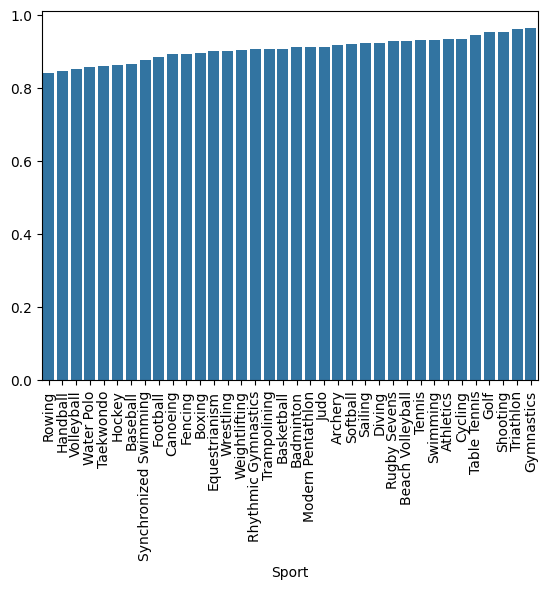

In [6]:
f1_scores.sort_values(inplace=True)
plot = sns.barplot(f1_scores)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [7]:
scores = f1_scores.reset_index()
scores.columns = ['Sport', 'F1 score']

merged_df = pd.merge(scores, df[['Sport', 'Medal Rate']].drop_duplicates(), on='Sport')
merged_df["Improvement over constant"] =  (1 - merged_df['Medal Rate']) / (1 - merged_df['F1 score'])
print(merged_df)


                    Sport  F1 score  Medal Rate  Improvement over constant
0                  Rowing  0.840446    0.270090                   4.574684
1                Handball  0.846257    0.282314                   4.668080
2              Volleyball  0.853460    0.292341                   4.829120
3              Water Polo  0.856440    0.280986                   5.008448
4               Taekwondo  0.860927    0.241611                   5.453180
5                  Hockey  0.862069    0.273921                   5.264071
6                Baseball  0.867314    0.393617                   4.570057
7   Synchronized Swimming  0.878173    0.252061                   6.139331
8                Football  0.884922    0.243979                   6.569666
9                Canoeing  0.893983    0.187568                   7.663214
10                Fencing  0.894194    0.169650                   7.847851
11                 Boxing  0.895509    0.162274                   8.017249
12          Equestrianism

<Axes: xlabel='Medal Rate', ylabel='F1 score'>

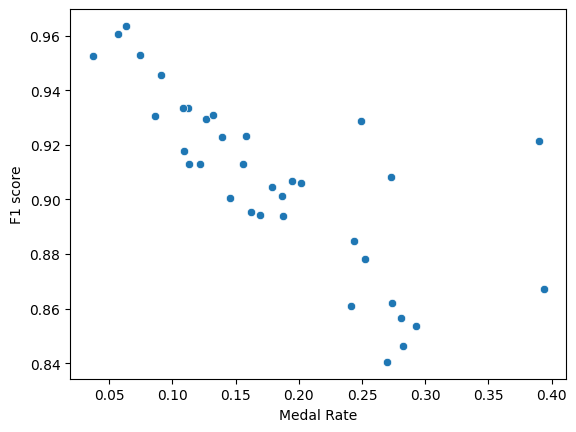

In [8]:
sns.scatterplot(data=merged_df, x='Medal Rate', y='F1 score')

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20588\2542800945.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Baseball'),
 Text(1, 0, 'Rowing'),
 Text(2, 0, 'Handball'),
 Text(3, 0, 'Volleyball'),
 Text(4, 0, 'Water Polo'),
 Text(5, 0, 'Hockey'),
 Text(6, 0, 'Taekwondo'),
 Text(7, 0, 'Synchronized Swimming'),
 Text(8, 0, 'Football'),
 Text(9, 0, 'Canoeing'),
 Text(10, 0, 'Softball'),
 Text(11, 0, 'Fencing'),
 Text(12, 0, 'Basketball'),
 Text(13, 0, 'Boxing'),
 Text(14, 0, 'Wrestling'),
 Text(15, 0, 'Rhythmic Gymnastics'),
 Text(16, 0, 'Equestrianism'),
 Text(17, 0, 'Weightlifting'),
 Text(18, 0, 'Trampolining'),
 Text(19, 0, 'Judo'),
 Text(20, 0, 'Modern Pentathlon'),
 Text(21, 0, 'Badminton'),
 Text(22, 0, 'Rugby Sevens'),
 Text(23, 0, 'Archery'),
 Text(24, 0, 'Diving'),
 Text(25, 0, 'Sailing'),
 Text(26, 0, 'Beach Volleyball'),
 Text(27, 0, 'Swimming'),
 Text(28, 0, 'Tennis'),
 Text(29, 0, 'Athletics'),
 Text(30, 0, 'Cycling'),
 Text(31, 0, 'Table Tennis'),
 Text(32, 0, 'Shooting'),
 Text(33, 0, 'Golf'),
 Text(34, 0, 'Triathlon'),
 Text(35, 0, 'Gymnastics')]

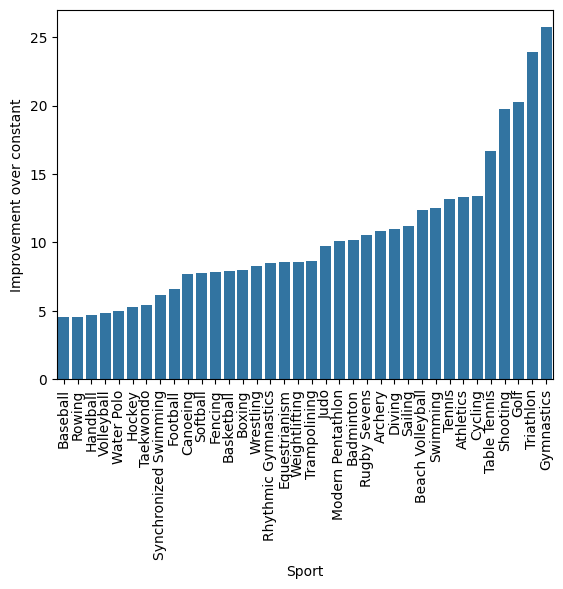

In [9]:
merged_df.sort_values(inplace=True, by="Improvement over constant")
plot = sns.barplot(data=merged_df, x='Sport', y="Improvement over constant")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [10]:
appearances = df.groupby("Sport")["ID"].count().sort_values().reset_index(name='Appearances')
appearances


,Sport,Appearances
0,Golf,108
1,Trampolining,149
2,Rugby Sevens,297
3,Softball,441
4,Triathlon,526
5,Beach Volleyball,538
6,Taekwondo,596
7,Rhythmic Gymnastics,615
8,Baseball,846
9,Synchronized Swimming,849


In [11]:
import matplotlib.pyplot as plt

data = pd.merge(appearances, merged_df, on='Sport')
sns.scatterplot(data=data, x='Appearances', y='Youden J')
plt.xscale('log')
plt.show()

ValueError: Could not interpret value `Youden J` for `y`. An entry with this name does not appear in `data`.

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,medal_rate,Medal Rate
41853,67721,34618,Feng Shanshan,F,26.0,170.0,85.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,Bronze,True,29.411765,0.037037,0.037037
78381,128243,64576,"Matthew Gregory ""Matt"" Kuchar",M,38.0,193.0,86.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Men's Individual,Bronze,True,23.087868,0.037037,0.037037
111974,182085,91521,Park In-Bee,F,28.0,168.0,65.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,Gold,True,23.030045,0.037037,0.037037
140484,228899,114934,Henrik Olof Stenson,M,40.0,188.0,86.0,Sweden,SWE,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Men's Individual,Silver,True,24.332277,0.037037,0.037037


In [20]:
features = ["Sex", "Age", "Height", "BMI", "Sport", "NOC", "Won Medal"]
target = ["Won Medal"]

X = df[features].copy()
le = LabelEncoder()
X["NOC"] = le.fit_transform(X["NOC"])
X["Sport"] = le.fit_transform(X["Sport"])
X = pd.get_dummies(X, columns=["Sex"], drop_first=True)

y = df[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

medal_rate = X_train.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values().rename("Medal Rate")

X_train.merge(medal_rate, on='Sport')
X_test.merge(medal_rate, on='Sport')

X_train.drop(columns=['Won Medal'], inplace=True)
X_test.drop(columns=['Won Medal'], inplace=True)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_test['Sport'] = le.inverse_transform(X_test['Sport'])

# Calculate F1 score by sport and store in a DataFrame
f1_scores = []

for sport in X_test['Sport'].unique():
    sport_mask = X_test['Sport'] == sport
    f1 = f1_score(y_test[sport_mask], y_pred[sport_mask])
    f1_scores.append({'Sport': sport, 'F1 Score': f1})

f1_scores_df = pd.DataFrame(f1_scores)

print(f1_scores_df)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20588\353304647.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medal_rate = X_train.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values().rename("Medal Rate")


                    Sport  F1 Score
0                Football  0.497854
1                Swimming  0.534083
2           Equestrianism  0.306785
3              Water Polo  0.548544
4                  Boxing  0.135338
5                 Sailing  0.154506
6              Gymnastics  0.296443
7               Wrestling  0.255220
8                 Cycling  0.268571
9                 Fencing  0.341113
10                 Rowing  0.395349
11               Shooting  0.104803
12               Baseball  0.652632
13              Athletics  0.293731
14             Volleyball  0.517034
15              Triathlon  0.000000
16               Canoeing  0.451098
17                   Judo  0.202020
18               Handball  0.487179
19          Weightlifting  0.243655
20    Rhythmic Gymnastics  0.500000
21  Synchronized Swimming  0.608696
22                 Hockey  0.436911
23           Table Tennis  0.305556
24       Beach Volleyball  0.333333
25      Modern Pentathlon  0.306122
26               Softball  0

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20588\602953849.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Triathlon'),
 Text(1, 0, 'Golf'),
 Text(2, 0, 'Shooting'),
 Text(3, 0, 'Boxing'),
 Text(4, 0, 'Sailing'),
 Text(5, 0, 'Taekwondo'),
 Text(6, 0, 'Judo'),
 Text(7, 0, 'Archery'),
 Text(8, 0, 'Weightlifting'),
 Text(9, 0, 'Wrestling'),
 Text(10, 0, 'Tennis'),
 Text(11, 0, 'Badminton'),
 Text(12, 0, 'Cycling'),
 Text(13, 0, 'Athletics'),
 Text(14, 0, 'Gymnastics'),
 Text(15, 0, 'Table Tennis'),
 Text(16, 0, 'Modern Pentathlon'),
 Text(17, 0, 'Equestrianism'),
 Text(18, 0, 'Beach Volleyball'),
 Text(19, 0, 'Trampolining'),
 Text(20, 0, 'Fencing'),
 Text(21, 0, 'Rugby Sevens'),
 Text(22, 0, 'Rowing'),
 Text(23, 0, 'Diving'),
 Text(24, 0, 'Hockey'),
 Text(25, 0, 'Canoeing'),
 Text(26, 0, 'Handball'),
 Text(27, 0, 'Football'),
 Text(28, 0, 'Rhythmic Gymnastics'),
 Text(29, 0, 'Volleyball'),
 Text(30, 0, 'Swimming'),
 Text(31, 0, 'Water Polo'),
 Text(32, 0, 'Synchronized Swimming'),
 Text(33, 0, 'Baseball'),
 Text(34, 0, 'Basketball'),
 Text(35, 0, 'Softball')]

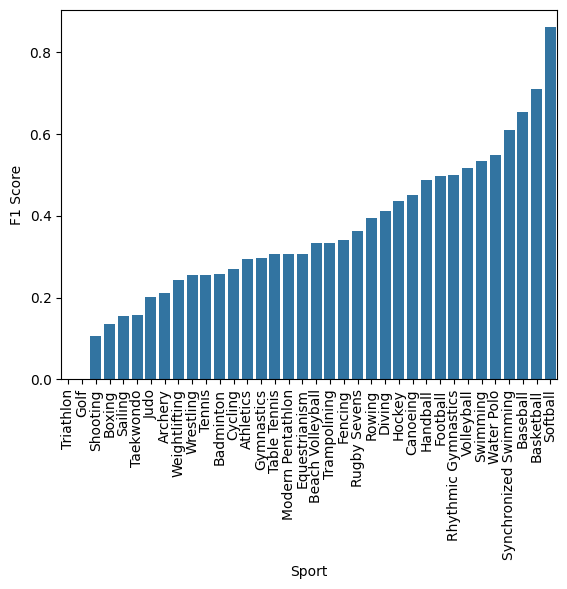

In [24]:
plot = sns.barplot(data=f1_scores_df.sort_values(by='F1 Score'), x='Sport', y='F1 Score')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_20588\2221567255.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged = pd.merge(df.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values().rename('Medal Rate'), f1_scores_df, on='Sport')


<Axes: xlabel='Medal Rate', ylabel='F1 Score'>

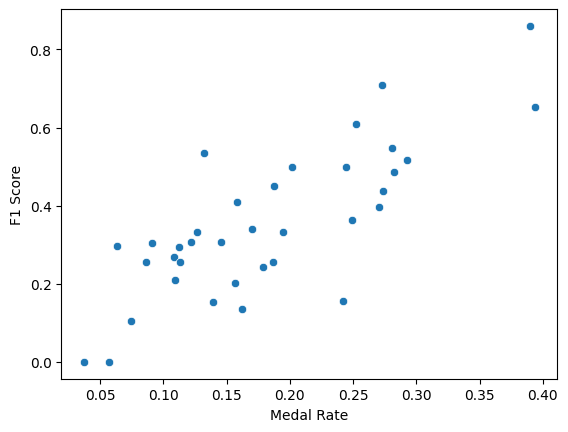

In [29]:
merged = pd.merge(df.groupby('Sport').apply(lambda df: df[df["Won Medal"] == True].shape[0] / df.shape[0]).sort_values().rename('Medal Rate'), f1_scores_df, on='Sport')
sns.scatterplot(data=merged, x='Medal Rate', y='F1 Score')